Sandbox for Lectures 28/03/2022

In [2]:
import numpy as np
import math
from scipy.special import factorial
import matplotlib.pyplot as plt
import sys
plt.style.use('seaborn-poster')

In [2]:
.1 + .1 +.1 == .3

False

In [3]:
.1

0.1

In [4]:
(.1+.1+.1) - .3

5.551115123125783e-17

In [5]:
round(.1 + .1 + .1, 10) == round(.3, 10)

True

In [6]:
math.exp(-7)

0.0009118819655545162

In [3]:
def function_test(max_n):
    sum=1.00
    for n in range(1,max_n):
        sum += (-7)**n/factorial(n)
    print(sum)

In [7]:
function_test(27)

0.0009167030052464701


In [8]:
def function_test_alternate(max_n):
    sum=1.00
    for n in range(1,max_n):
        sum += (7)**n/factorial(n)
    sum = 1/sum
    print(sum)

In [13]:
function_test_alternate(21)

0.0009118951837867185


Use the spacing function to determine the gap at 1e9. Verify that adding a number to 1e9 that is less than half the gap at 1e9 results in the same number.

In [72]:
np.spacing(1e9)

1.1920928955078125e-07

In [73]:
1e9 == (1e9 + np.spacing(1e9)/3)

True

There are special cases for the value of a floating point number when e = 0 (i.e., e = 00000000000 (base2)) and when e = 2047 (i.e., e = 11111111111 (base2)), which are reserved. When the exponent is 0, the leading 1 in the fraction takes the value 0 instead. The result is a subnormal number, which is computed by 𝑛=(−1)𝑠2−1022(0+𝑓) (note: it is -1022 instead of -1023). When the exponent is 2047 and f is nonzero, then the result is “Not a Number”, which means that the number is undefined. When the exponent is 2047, then f = 0 and s = 0, and the result is positive infinity. When the exponent is 2047, then f = 0, and s = 1, and the result is minus infinity.

TRY IT! Compute the base10 value for 0 11111111110 1111111111111111111111111111111111111111111111111111 (IEEE754), the largest defined number for 64 bits, and for 0 00000000001 000000000000000000000000000000000000000000000000000 (IEEE754), the smallest. Note that the exponent is, respectively, e = 2046 and e = 1 to comply with the previously stated rules. Verify that Python agrees with these calculations using sys.float_info.max and sys.float_info.min.

In [89]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [111]:
b = np.arange(1, 53)
largest = (2**(2046-1023))*((1 + np.sum(0.5**b)))
largest

1.7976931348623157e+308

The smallest subnormal number in 64-bit number has s = 0, e = 00000000000, and f = 0000000000000000000000000000000000000000000000000001. Using the special rules for subnormal numbers, this results in the subnormal number (−1)021−10232−52=2−1074. Show that 2−1075 underflows to 0.0 and that the result cannot be distinguished from 0.0. Show that 2−1074 does not.

In [90]:
2**(-1075)

0.0

In [91]:
2**(-1075) == 0

True

In [88]:
smallest = (2**(1-1023))*(1+0)
smallest

2.2250738585072014e-308

In [92]:
2**(-1074)

5e-324

So, what have we gained by using IEEE754 versus binary? Using 64 bits binary gives us 264 numbers. Since the number of bits does not change between binary and IEEE754, IEEE754 must also give us 264 numbers. In binary, numbers have a constant spacing between them. As a result, you cannot have both range (i.e., large distance between minimum and maximum representable numbers) and precision (i.e., small spacing between numbers). Controlling these parameters would depend on where you put the decimal point in your number. IEEE754 overcomes this limitation by using very high precision at small numbers and very low precision at large numbers. This limitation is usually acceptable because the gap at large numbers is still small relative to the size of the number itself. Therefore, even if the gap is millions large, it is irrelevant to normal calculations if the number under consideration is in the trillions or higher.

DERIVATIVES

Python has a command that can be used to compute finite differences directly: for a vector 𝑓, the command 𝑑=𝑛𝑝.𝑑𝑖𝑓𝑓(𝑓) produces an array 𝑑 in which the entries are the differences of the adjacent elements in the initial array 𝑓. In other words 𝑑(𝑖)=𝑓(𝑖+1)−𝑓(𝑖).

WARNING! When using the command np.diff, the size of the output is one less than the size of the input since it needs two arguments to produce a difference.

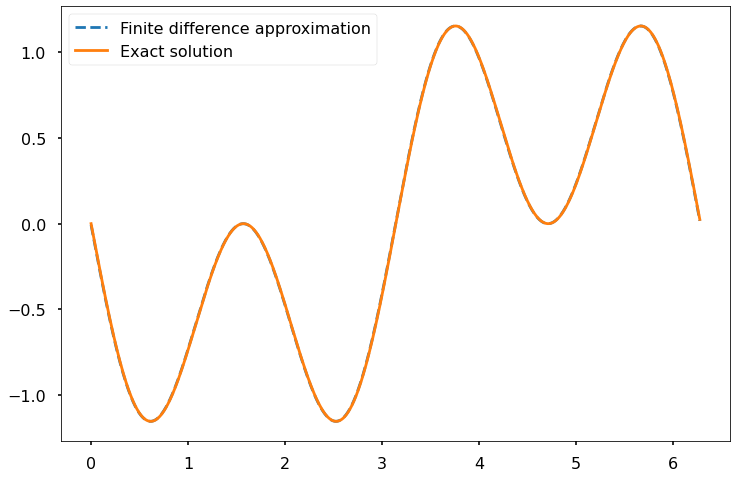

0.007499963397969822


In [21]:
# step size
h = 0.005
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(x)**3

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff)*3*np.cos(x_diff)**2 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

As the above figure shows, there is a small offset between the two curves, which results from the numerical error in the evaluation of the numerical derivatives. The maximal error between the two numerical results is of the order 0.05 and expected to decrease with the size of the step.

As illustrated in the previous example, the finite difference scheme contains a numerical error due to the approximation of the derivative. This difference decreases with the size of the discretization step, which is illustrated in the following example.

The following code computes the numerical derivative of 𝑓(𝑥)=cos(𝑥) using the forward difference formula for decreasing step sizes, ℎ. It then plots the maximum error between the approximated derivative and the true derivative versus ℎ as shown in the generated figure.

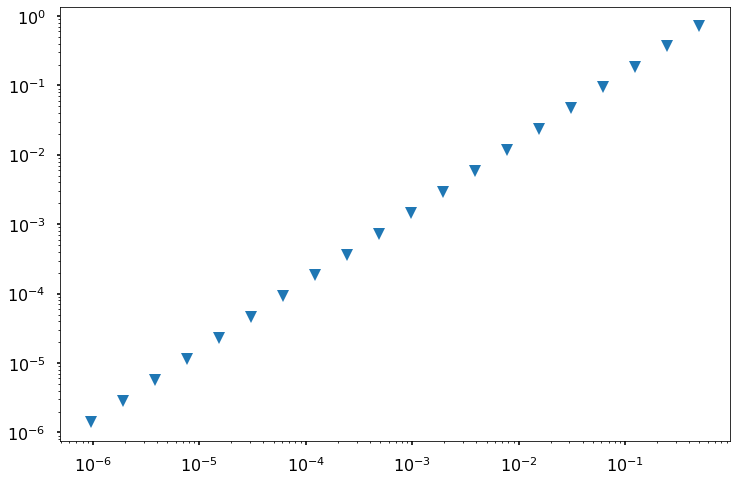

In [22]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20 
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    # compute function value at grid
    y = np.cos(x)**3
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    # compute corresponding grid
    x_diff = x[:-1] 
    # compute exact solution
    exact_solution = -np.sin(x_diff)*3*np.cos(x_diff)**2 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

The slope of the line in log-log space is 1; therefore, the error is proportional to ℎ, which means that, as expected, the forward difference formula is 𝑂(ℎ).

In [23]:
def f(x):
    return math.sin(x)**2/(1+math.tan(x))
def forward_difference(f,x0,h):
    d = (f(x0+h) - f(x0))/h
    return d
def backward_difference(f,x0,h):
    d = (f(x0) - f(x0-h))/h
    return d
def central_difference(f,x0,h):
    d = (f(x0+h) - f(x0-h))/(2*h)
    return d

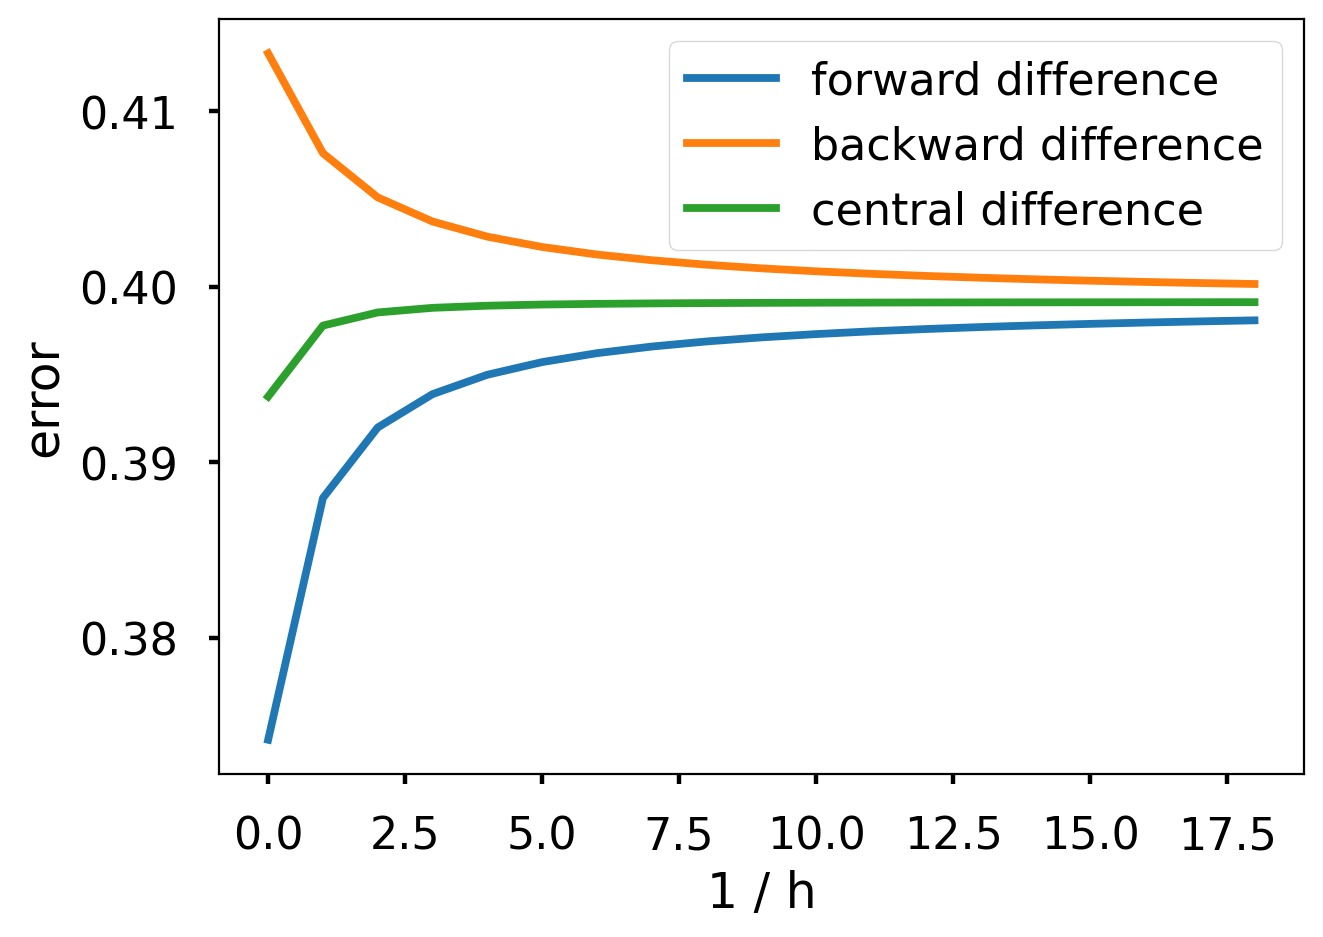

In [24]:
error_fd = []
error_bd = []
error_cd = []
h = 0.1
for i in range(1,20):
    fd = forward_difference(f,10,h/i)
    error_fd.append(np.abs(fd))
    
    bd = backward_difference(f,10,h/i)
    error_bd.append(np.abs(bd))
    
    cd = central_difference(f,10,h/i)
    error_cd.append(np.abs(cd))
plt.figure(figsize=(7,5),dpi=200)
plt.plot(error_fd, label='forward difference')
plt.plot(error_bd, label='backward difference')
plt.plot(error_cd, label='central difference')
plt.xlabel('1 / h')
plt.ylabel('error')
plt.legend()